<a href="https://colab.research.google.com/github/AbhiramNallamothu/Project/blob/main/Results_code_of_GROUP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install summac

In [ ]:
!pip install --upgrade transformers

  Using cached transformers-4.40.2-py3-none-any.whl (9.0 MB)
  Using cached huggingface_hub-0.23.0-py3-none-any.whl (401 kB)
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist

In [ ]:
!pip install rouge bert-score scikit-learn summa bert-extractive-summarizer rouge-score

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.translate.meteor_score import single_meteor_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rouge_score import rouge_scorer
from summa import summarizer
from summarizer import Summarizer
from bert_score import score
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk



# Path to the Excel file
file_path = "/content/INFO5731_GROUP8.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [ ]:
# Display the DataFrame
print(df)

       patent_id                                    patent document  \
0      US9615024   In various aspects systems and methods for co...   
1      US9619138   Service providers and device manufacturers (e...   
2      US9619863  Various aspects of examples of examples embodi...   
3      US9621542  Thus improving security of UID and how to util...   
4       S9621796  According to various but not necessarily all e...   
...          ...                                                ...   
1094   US8214649  The present invention discloses a system and m...   
1095   US8218421   In one embodiment of the present invention a ...   
1096   US8223227  These and other problems are generally solved ...   
1097   US8230035  An apparatus for capturing an electronic image...   
1098   US8230212  The present invention is directed to addressin...   

                                                summary  
0     The patent describes systems and methods for p...  
1     The patent describes a me

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Define preprocess_text function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Reconstruct text
    text = ' '.join(tokens)

    return text

# Tokenize and preprocess the text
df['preprocessed_patent'] = df['patent document'].apply(preprocess_text)
df['preprocessed_summary'] = df['summary'].apply(preprocess_text)

# **ROUGE SCORE**

In [ ]:
 # Compute ROUGE score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = []
rouge2_scores = []
for index, row in df.iterrows():
    rouge = scorer.score(row['preprocessed_patent'], row['preprocessed_summary'])
    rouge_scores.append(rouge['rouge1'][2])
    rouge2_scores.append(rouge['rouge2'][2])

df['rouge_scores'] = rouge_scores
df['rouge2_scores'] = rouge2_scores

In [ ]:
#can remove this
# Compute ROUGE score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = []
for index, row in df.iterrows():
    rouge = scorer.score(row['preprocessed_patent'], row['preprocessed_summary'])
    rouge_scores.append(rouge)

df['rouge_scores'] = rouge_scores

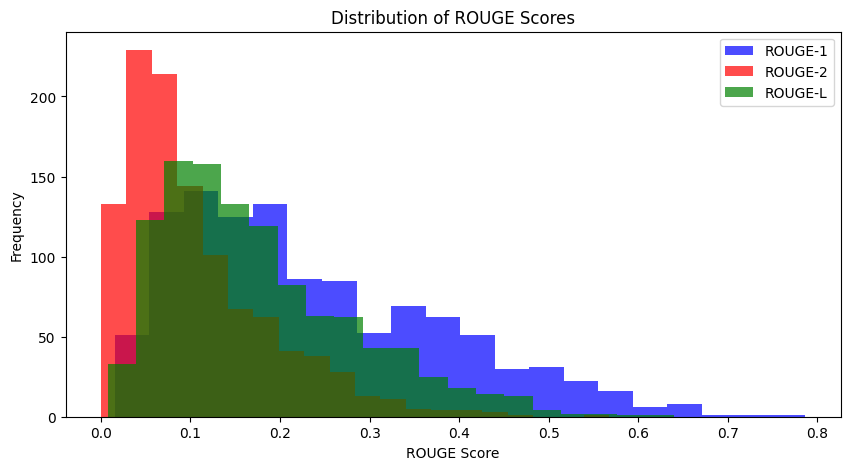

In [ ]:
# Extracting Rouge scores from dictionaries
rouge1_scores = [score['rouge1'][2] for score in df['rouge_scores']]
rouge2_scores = [score['rouge2'][2] for score in df['rouge_scores']]
rougeL_scores = [score['rougeL'][2] for score in df['rouge_scores']]

# Plotting Rouge scores
plt.figure(figsize=(10, 5))
plt.hist(rouge1_scores, bins=20, color='blue', alpha=0.7, label='ROUGE-1')
plt.hist(rouge2_scores, bins=20, color='red', alpha=0.7, label='ROUGE-2')
plt.hist(rougeL_scores, bins=20, color='green', alpha=0.7, label='ROUGE-L')
plt.title('Distribution of ROUGE Scores')
plt.xlabel('ROUGE Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# SUMMAC SCORES

In [ ]:
! pip install summac

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 11.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 108.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 35.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 108.0 M

In [ ]:
from summac.model_summac import SummaCZS

model_zs = SummaCZS(granularity="sentence", model_name="vitc", device="cuda") # GPU -> device="cuda", CPU -> device="cpu"
score_zs1 = model_zs.score(df["preprocessed_patent"], df["preprocessed_summary"])
print(score_zs1)

{'scores': [0.69085693359375, 0.23065185546875, 0.0718994140625, 0.118865966796875, 0.0321044921875, 0.05865478515625, 0.240020751953125, 0.19793701171875, 0.72186279296875, 0.02447509765625, 0.356109619140625, 0.028228759765625, 0.4222869873046875, 0.238006591796875, 0.1130828857421875, 0.063812255859375, 0.023040771484375, 0.27874755859375, 0.15771484375, 0.1813201904296875, 0.333648681640625, -0.003875732421875, 0.17059326171875, 0.126251220703125, 0.6371612548828125, 0.182647705078125, 0.090576171875, 0.3489990234375, 0.69677734375, 0.24627685546875, 0.190643310546875, 0.084716796875, 0.7009048461914062, 0.1357421875, 0.0947265625, 0.0301513671875, 0.081756591796875, -0.0489044189453125, 0.461456298828125, 0.598785400390625, -0.39404296875, 0.1522216796875, 0.22979736328125, 0.784942626953125, 0.24688720703125, 0.4996337890625, 0.40277099609375, 0.10302734375, -0.13970947265625, 0.0120849609375, -0.04986572265625, -0.0123291015625, 0.259521484375, 0.4701385498046875, 0.046508789062

In [ ]:
summac_scores = score_zs1["scores"]

In [ ]:
summac_scores

[0.69085693359375,
 0.23065185546875,
 0.0718994140625,
 0.118865966796875,
 0.0321044921875,
 0.05865478515625,
 0.240020751953125,
 0.19793701171875,
 0.72186279296875,
 0.02447509765625,
 0.356109619140625,
 0.028228759765625,
 0.4222869873046875,
 0.238006591796875,
 0.1130828857421875,
 0.063812255859375,
 0.023040771484375,
 0.27874755859375,
 0.15771484375,
 0.1813201904296875,
 0.333648681640625,
 -0.003875732421875,
 0.17059326171875,
 0.126251220703125,
 0.6371612548828125,
 0.182647705078125,
 0.090576171875,
 0.3489990234375,
 0.69677734375,
 0.24627685546875,
 0.190643310546875,
 0.084716796875,
 0.7009048461914062,
 0.1357421875,
 0.0947265625,
 0.0301513671875,
 0.081756591796875,
 -0.0489044189453125,
 0.461456298828125,
 0.598785400390625,
 -0.39404296875,
 0.1522216796875,
 0.22979736328125,
 0.784942626953125,
 0.24688720703125,
 0.4996337890625,
 0.40277099609375,
 0.10302734375,
 -0.13970947265625,
 0.0120849609375,
 -0.04986572265625,
 -0.0123291015625,
 0.2595214

In [ ]:
df['summa_c_scores'] = summac_scores

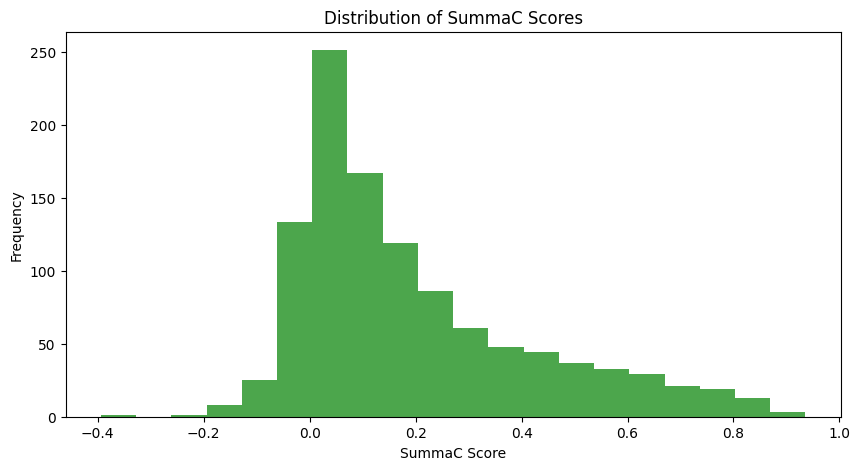

In [ ]:
# Plotting SummaC scores
plt.figure(figsize=(10, 5))
plt.hist(df['summa_c_scores'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of SummaC Scores')
plt.xlabel('SummaC Score')
plt.ylabel('Frequency')
plt.show()

# **BERT SCORE**

In [ ]:
!pip install --upgrade transformers

  Using cached transformers-4.40.2-py3-none-any.whl (9.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.0
    Uninstalling huggingface-hub-0.17.0:
      Successfully uninstalled huggingface-hub-0.17.0
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
summac 0.0.4 requires huggingface-hub<=0.17.0, but you have hu

In [ ]:
# Fit the TF-IDF vectorizer on the entire corpus of text data
corpus = df['preprocessed_patent'].tolist() + df['preprocessed_summary'].tolist()
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

# Implement BERT score calculation
bert_scores = []
for index, row in df.iterrows():
    _, _, f1 = score([row['preprocessed_patent']], [row['preprocessed_summary']], lang='en')  # Specify the language as 'en' (English)
    bert_scores.append(f1.item())  # Assuming you're interested in F1 score

df['bert_scores'] = bert_scores

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro

In [ ]:
# Now use BERT model to compare the two rows: Patent Document and Patent Summary
def calculate_bert_score(document, summary):
    _, _, bert_scores = score([summary], [document], lang='en', verbose=False)
    return bert_scores.mean().item()

# Calculate BERT scores for each row
bert_scores = []
for index, row in df.iterrows():
    bert_score = calculate_bert_score(row['preprocessed_patent'], row['preprocessed_summary'])
    bert_scores.append(bert_score)

# Assign BERT scores to DataFrame
df['bert_scores'] = bert_scores

# Display DataFrame with BERT scores
print(df)

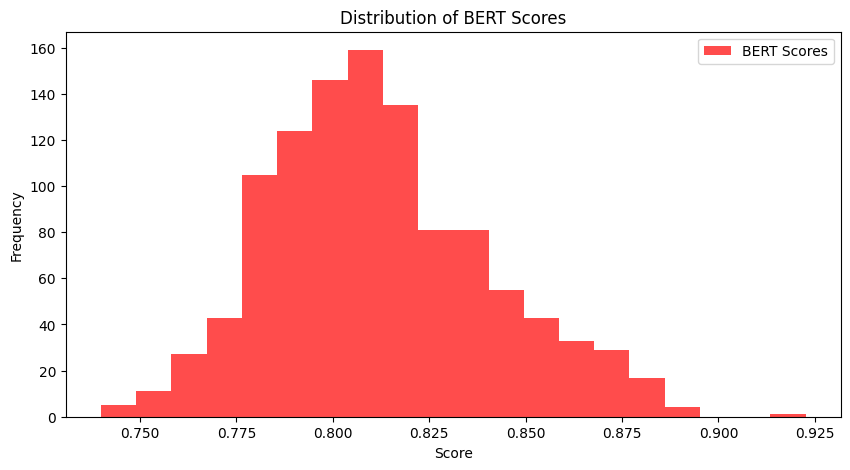

In [ ]:
# Plotting BERT scores
plt.figure(figsize=(10, 5))
plt.hist(df['bert_scores'], bins=20, color='red', alpha=0.7, label='BERT Scores')
plt.title('Distribution of BERT Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# **BLEU SCORE**

In [ ]:
# Compute BLEU score
bleu_scores = []
for index, row in df.iterrows():
    candidate = row['preprocessed_summary'].split()
    reference = row['preprocessed_patent'].split()
    bleu = sentence_bleu([reference], candidate)
    bleu_scores.append(bleu)

df['bleu_scores'] = bleu_scores

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

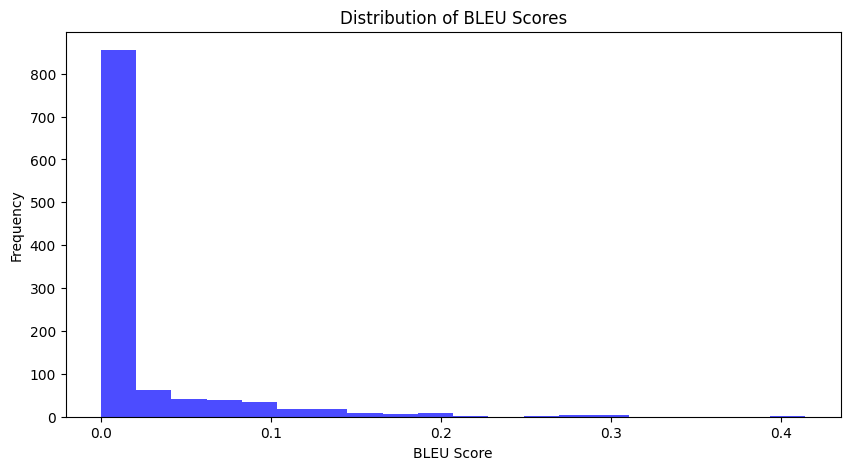

In [ ]:
# Plotting BLEU scores
plt.figure(figsize=(10, 5))
plt.hist(df['bleu_scores'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of BLEU Scores')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.show()

# **METEOR SCORE**

In [ ]:
# Compute METEOR score
meteor_scores = []
for index, row in df.iterrows():
    hypothesis_tokens = word_tokenize(row['preprocessed_summary'])
    reference_tokens = word_tokenize(row['preprocessed_patent'])
    meteor = single_meteor_score(reference_tokens, hypothesis_tokens)
    meteor_scores.append(meteor)

df['meteor_scores'] = meteor_scores

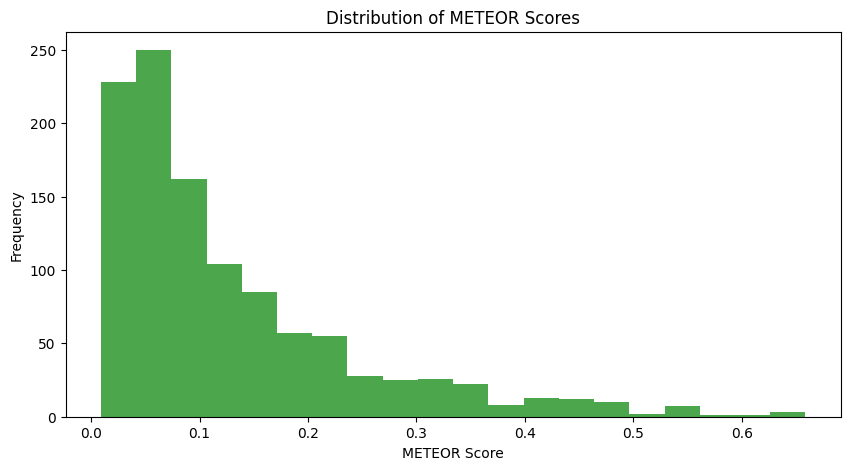

In [ ]:
# Plotting METEOR scores
plt.figure(figsize=(10, 5))
plt.hist(df['meteor_scores'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of METEOR Scores')
plt.xlabel('METEOR Score')
plt.ylabel('Frequency')
plt.show()

# **COSINE SIMILARITY**

In [ ]:
# Fit the TF-IDF vectorizer on the entire corpus of text data
corpus = df['preprocessed_patent'].tolist() + df['preprocessed_summary'].tolist()
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

# Define text_to_vector function using the fitted TF-IDF vectorizer
def text_to_vector(text):
    vector = vectorizer.transform([text])
    return vector.toarray()[0]

# Compute cosine similarity
cosine_similarities = []
for index, row in df.iterrows():
    candidate = row['preprocessed_summary']
    reference = row['preprocessed_patent']
    candidate_vector = text_to_vector(candidate)
    reference_vector = text_to_vector(reference)
    cosine_sim = cosine_similarity([candidate_vector], [reference_vector])[0][0]
    cosine_similarities.append(cosine_sim)

df['cosine_similarity'] = cosine_similarities

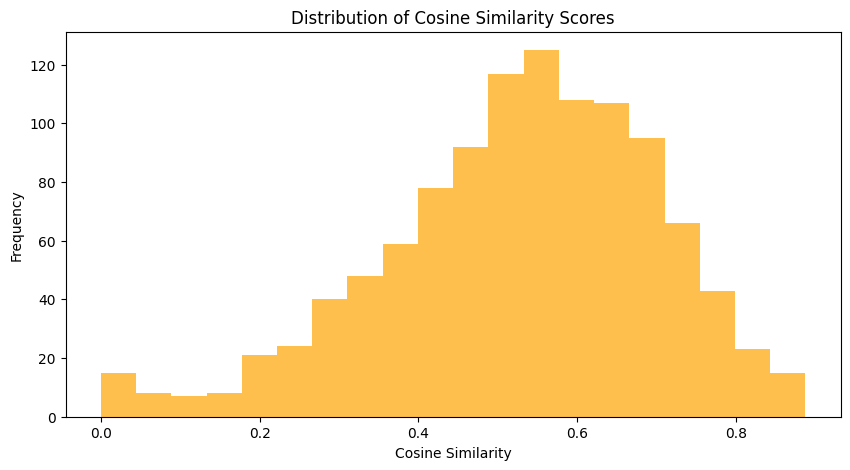

In [ ]:
# Plotting cosine similarity scores
plt.figure(figsize=(10, 5))
plt.hist(df['cosine_similarity'], bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

# **SUMAC SCORE**

In [ ]:
#differen code trying to get summac score
# Define weights for each score
weights = {
    'rouge1': 0.3,
    'rouge2': 0.3,
    'bleu': 0.2,
    'meteor': 0.1,
    'cosine_similarity': 0.1
}

# Compute the individual scores as before
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)
rouge1_scores = []
rouge2_scores = []
for index, row in df.iterrows():
    rouge = scorer.score(row['preprocessed_patent'], row['preprocessed_summary'])
    rouge1_scores.append(rouge['rouge1'][2])
    rouge2_scores.append(rouge['rouge2'][2])

df['rouge1_scores'] = rouge1_scores
df['rouge2_scores'] = rouge2_scores

bleu_scores = []
for index, row in df.iterrows():
    candidate = row['preprocessed_summary'].split()
    reference = row['preprocessed_patent'].split()
    bleu = sentence_bleu([reference], candidate)
    bleu_scores.append(bleu)

df['bleu_scores'] = bleu_scores

meteor_scores = []
for index, row in df.iterrows():
    hypothesis_tokens = word_tokenize(row['preprocessed_summary'])
    reference_tokens = word_tokenize(row['preprocessed_patent'])
    meteor = single_meteor_score(reference_tokens, hypothesis_tokens)
    meteor_scores.append(meteor)

df['meteor_scores'] = meteor_scores

# Fit the TF-IDF vectorizer on the entire corpus of text data
corpus = df['preprocessed_patent'].tolist() + df['preprocessed_summary'].tolist()
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

# Define text_to_vector function using the fitted TF-IDF vectorizer
def text_to_vector(text):
    vector = vectorizer.transform([text])
    return vector.toarray()[0]

# Compute cosine similarity
cosine_similarities = []
for index, row in df.iterrows():
    candidate = row['preprocessed_summary']
    reference = row['preprocessed_patent']
    candidate_vector = text_to_vector(candidate)
    reference_vector = text_to_vector(reference)
    cosine_sim = cosine_similarity([candidate_vector], [reference_vector])[0][0]
    cosine_similarities.append(cosine_sim)

df['cosine_similarity'] = cosine_similarities

# Combine scores to calculate SummaC score
summac_scores = []
for index, row in df.iterrows():
    summac_score = (
        weights['rouge1'] * row['rouge1_scores'] +
        weights['rouge2'] * row['rouge2_scores'] +
        weights['bleu'] * row['bleu_scores'] +
        weights['meteor'] * row['meteor_scores'] +
        weights['cosine_similarity'] * row['cosine_similarity']
    )
    summac_scores.append(summac_score)

df['summac_scores'] = summac_scores

In [ ]:
print(df['summac_scores'])

In [ ]:
# Plotting SummaC scores
plt.figure(figsize=(10, 5))
plt.hist(df['summa_c_scores'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of SummaC Scores')
plt.xlabel('SummaC Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Print out individual scores and SummaC scores for each model
for index, row in df.iterrows():
    print("Model:", index)  # Use index as model name
    print("ROUGE-1 Score:", row['rouge1_scores'])
    print("ROUGE-2 Score:", row['rouge2_scores'])
    print("BLEU Score:", row['bleu_scores'])
    print("METEOR Score:", row['meteor_scores'])
    print("Cosine Similarity Score:", row['cosine_similarity'])
    print("SummaC Score:", row['summac_scores'])
    print("\n")

In [ ]:
# Visualize individual scores and SummaC scores
plt.figure(figsize=(12, 8))

# Plot individual scores with error bars
plt.errorbar(df.index, df['rouge1_scores'], yerr=np.std(df['rouge1_scores']), label='ROUGE-1', marker='o', capsize=5)
plt.errorbar(df.index, df['rouge2_scores'], yerr=np.std(df['rouge2_scores']), label='ROUGE-2', marker='o', capsize=5)
plt.errorbar(df.index, df['bleu_scores'], yerr=np.std(df['bleu_scores']), label='BLEU', marker='o', capsize=5)
plt.errorbar(df.index, df['meteor_scores'], yerr=np.std(df['meteor_scores']), label='METEOR', marker='o', capsize=5)
plt.errorbar(df.index, df['cosine_similarity'], yerr=np.std(df['cosine_similarity']), label='Cosine Similarity', marker='o', capsize=5)

# Plot SummaC scores
plt.errorbar(df.index, df['summac_scores'], yerr=np.std(df['summac_scores']), label='SummaC', color='black', linewidth=2, linestyle='--', capsize=5)

plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Individual Scores and SummaC Scores for Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Plot SummaC scores
plt.plot(df.index, df['summac_scores'], label='SummaC', color='black', linewidth=2, linestyle='--')

plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Individual Scores and SummaC Scores for Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
display(df[["rouge_scores", "summa_c_scores", "bert_scores", "bleu_scores", "cosine_similarity"]].head(1100))

,rouge_scores,summa_c_scores,bert_scores,bleu_scores,cosine_similarity
0,"{'rouge1': (0.8723404255319149, 0.239766081871...",0.690857,0.846367,7.027893e-156,0.628022
1,"{'rouge1': (0.23076923076923078, 0.34615384615...",0.230652,0.822074,7.855643e-02,0.231066
2,"{'rouge1': (0.5, 0.10926365795724466, 0.179337...",0.071899,0.766605,4.318358e-80,0.241910
3,"{'rouge1': (0.6590909090909091, 0.026484018264...",0.118866,0.778630,3.314956e-12,0.238555
4,"{'rouge1': (0.6891891891891891, 0.082125603864...",0.032104,0.780733,8.550020e-05,0.546865
...,...,...,...,...,...
1094,"{'rouge1': (0.7166666666666667, 0.101895734597...",0.747910,0.809296,4.317797e-04,0.432958
1095,"{'rouge1': (0.6447368421052632, 0.085217391304...",-0.026855,0.799677,3.244975e-04,0.472602
1096,"{'rouge1': (0.47560975609756095, 0.02803738317...",-0.004761,0.784017,8.066868e-162,0.279807
1097,"{'rouge1': (0.8181818181818182, 0.043478260869...",0.041595,0.803407,1.912588e-09,0.492567


from matplotlib import pyplot as plt
_df_0['summa_c_scores'].plot(kind='hist', bins=20, title='summa_c_scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bert_scores'].plot(kind='hist', bins=20, title='bert_scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bleu_scores'].plot(kind='hist', bins=20, title='bleu_scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['cosine_similarity'].plot(kind='hist', bins=20, title='cosine_similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='summa_c_scores', y='bert_scores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='bert_scores', y='bleu_scores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='bleu_scores', y='cosine_similarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['summa_c_scores'].plot(kind='line', figsize=(8, 4), title='summa_c_scores')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['bert_scores'].plot(kind='line', figsize=(8, 4), title='bert_scores')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['bleu_scores'].plot(kind='line', figsize=(8, 4), title='bleu_scores')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['cosine_similarity'].plot(kind='line', figsize=(8, 4), title='cosine_similarity')
plt.gca().spines[['top', 'right']].set_visible(False)